In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
import matplotlib as plt
from matplotlib import *
from scipy.stats.mstats import winsorize

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# data modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [3]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.index

RangeIndex(start=0, stop=2938, step=1)

In [6]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

As we can see, there are many NA values . We first group the countries according to their status and then fill in the mean values accirding to status

In [7]:
df = df.groupby(['Status']).apply(lambda x: x.fillna(x.mean()))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [8]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [9]:
df.duplicated().sum()

0

As we can see, there are no duplicate rows in the dataset

Now we will plot histograms and boxplots for all the variables to get a better understanding of the outliers of the dataset

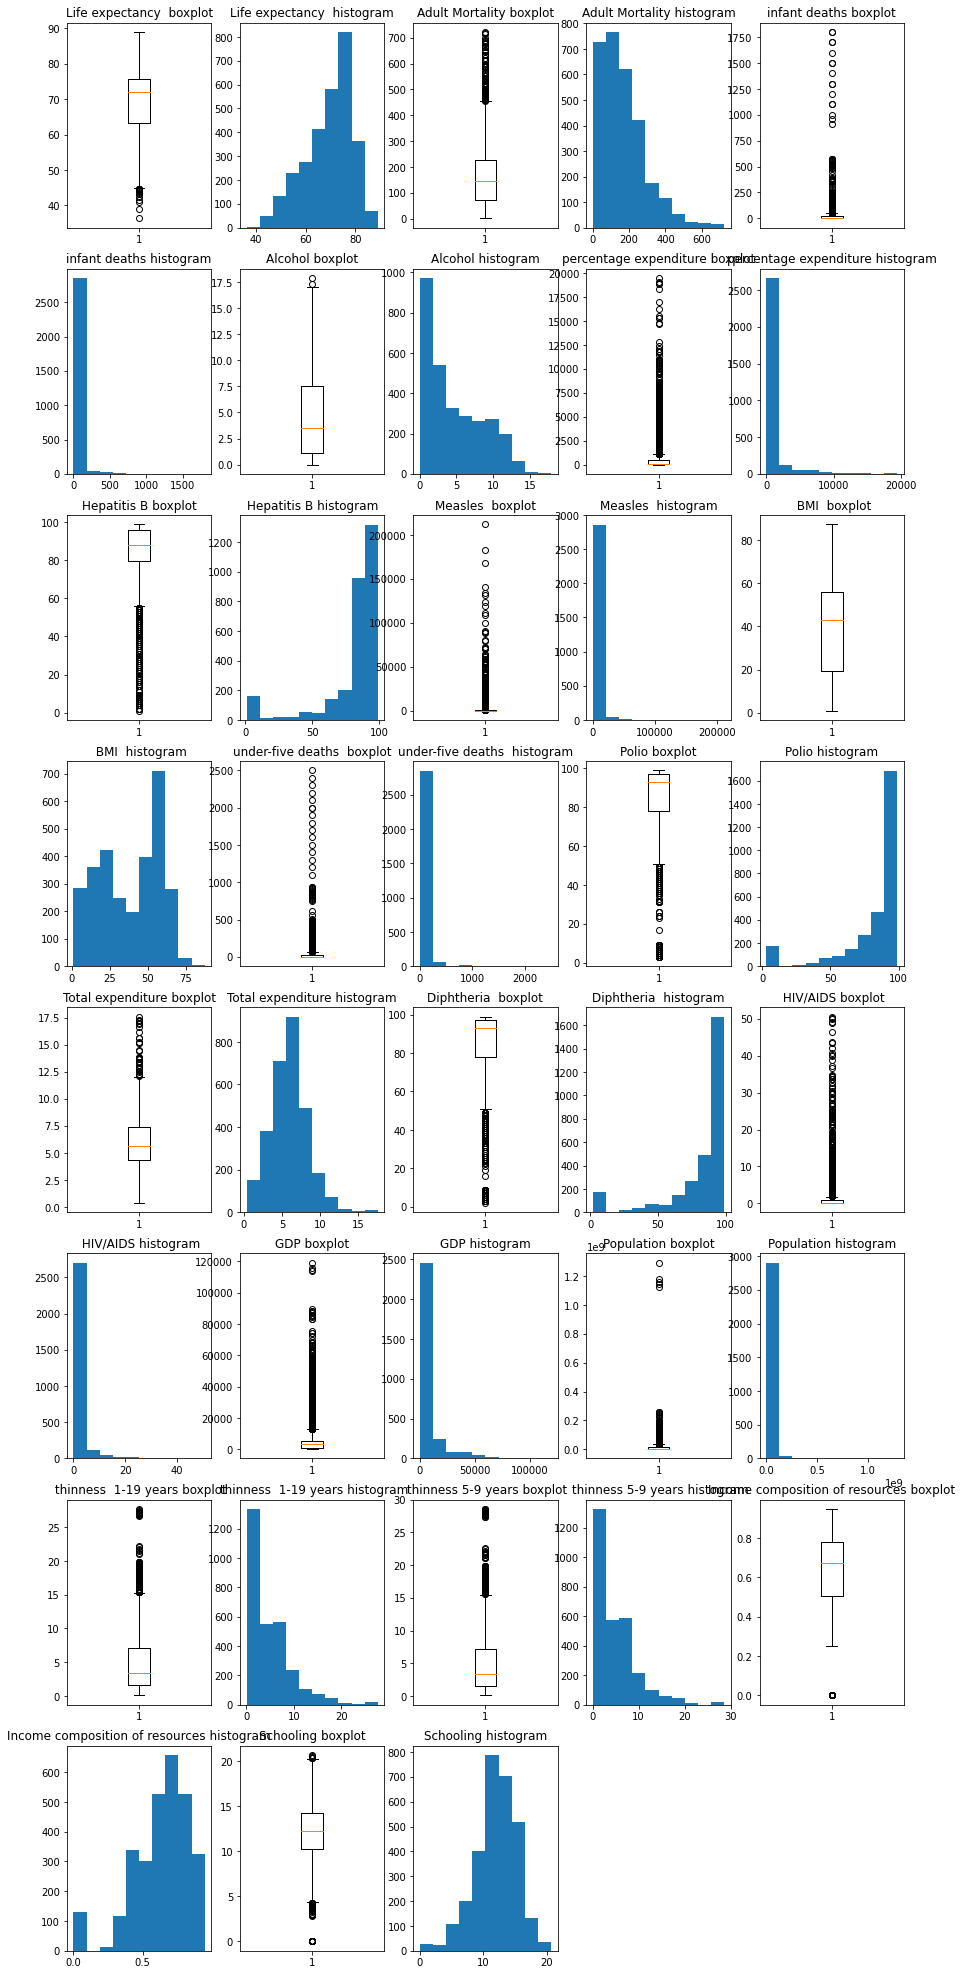

In [10]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    pyplot.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        pyplot.subplot(9, 5, i)
        pyplot.boxplot(data[col])
        pyplot.title('{} boxplot'.format(col))
        i += 1
        pyplot.subplot(9, 5, i)
        pyplot.hist(data[col])
        pyplot.title('{} histogram'.format(col))
    pyplot.show()
outliers_visual(df)

In [11]:
#Counting the outliers
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [12]:
for col in cont_vars:
    outlier_count(col)

---------------Life expectancy ---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------Adult Mortality---------------
Number of outliers: 86
Percent of data that is outlier: 2.93%
---------------infant deaths---------------
Number of outliers: 315
Percent of data that is outlier: 10.72%
---------------Alcohol---------------
Number of outliers: 2
Percent of data that is outlier: 0.07%
---------------percentage expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------Hepatitis B---------------
Number of outliers: 298
Percent of data that is outlier: 10.14%
---------------Measles ---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
--------------- BMI ---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under-five deaths ---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------Polio---------------
Numbe

Now we will Winsorize the data to reduce the impact of outliers

In [13]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        pyplot.figure(figsize=(15,5))
        pyplot.subplot(121)
        pyplot.boxplot(df[col])
        pyplot.title('original {}'.format(col))
        pyplot.subplot(122)
        pyplot.boxplot(wins_data)
        pyplot.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        pyplot.show()
    df[col]=wins_data

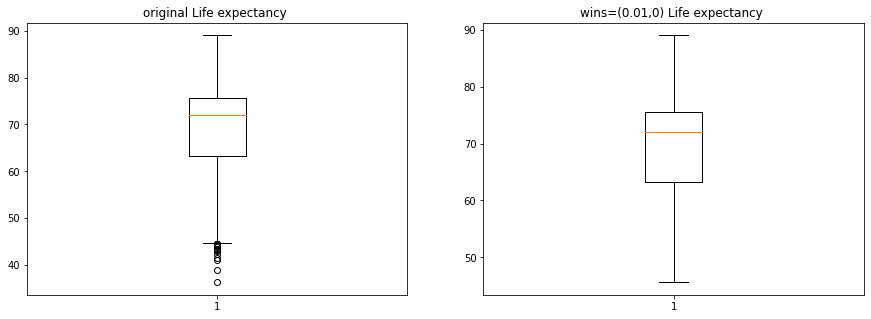

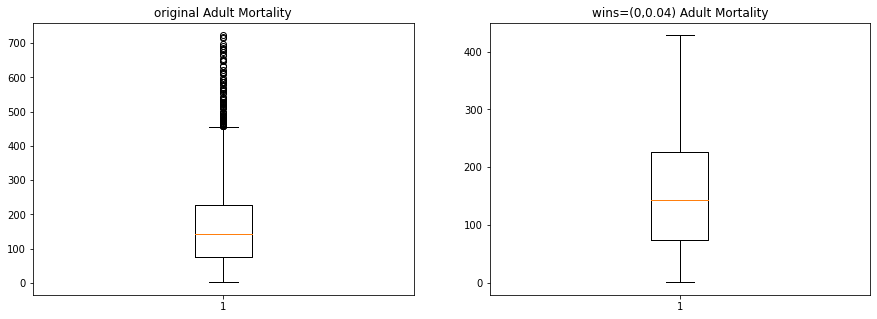

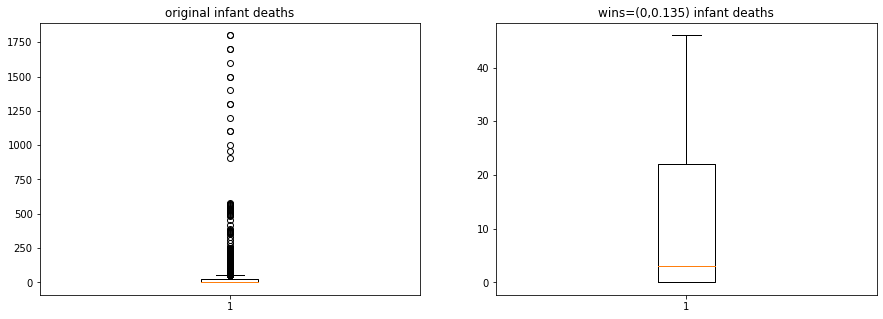

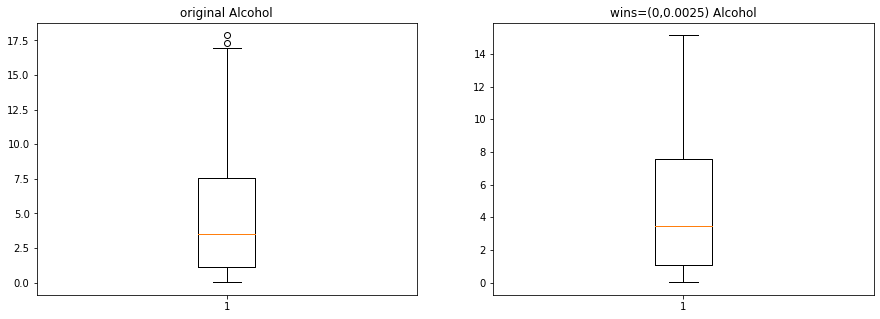

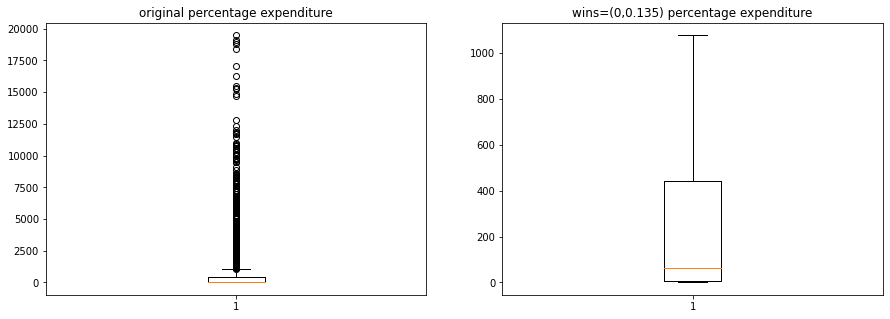

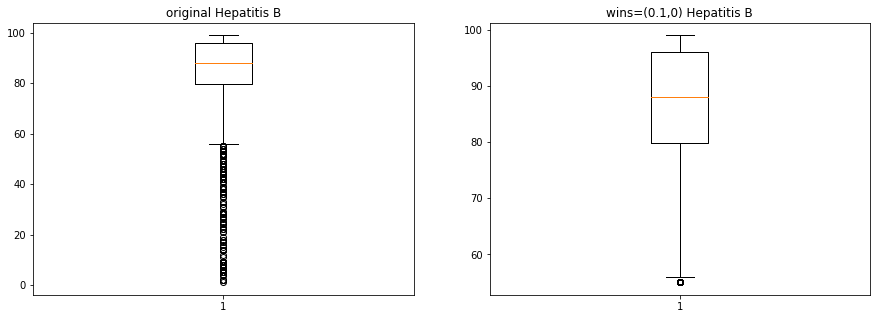

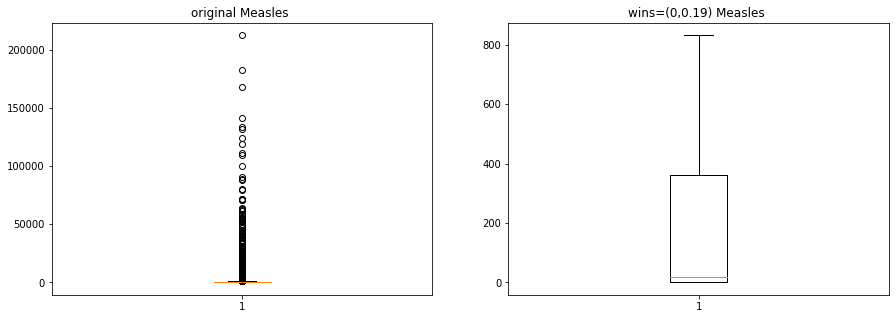

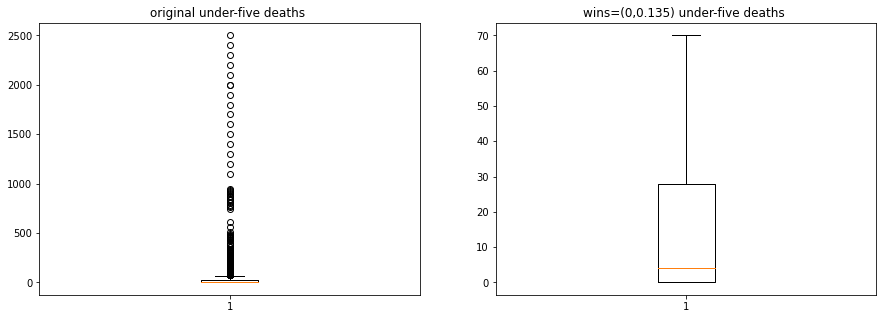

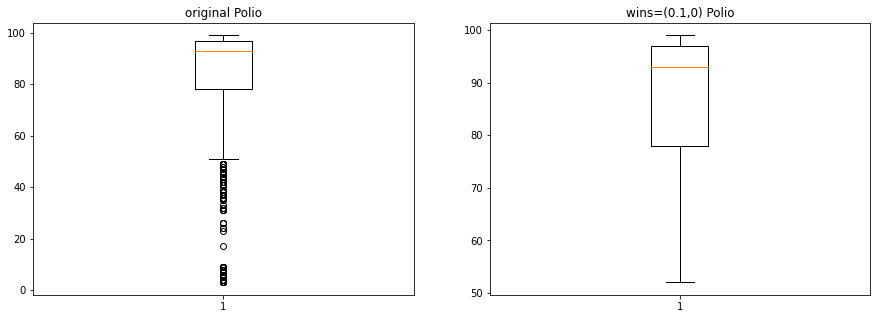

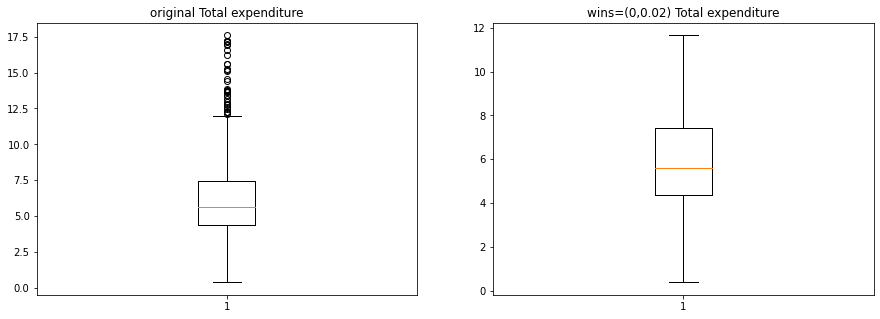

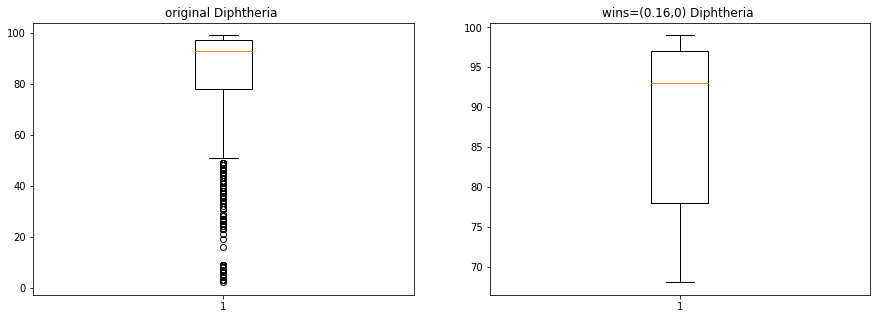

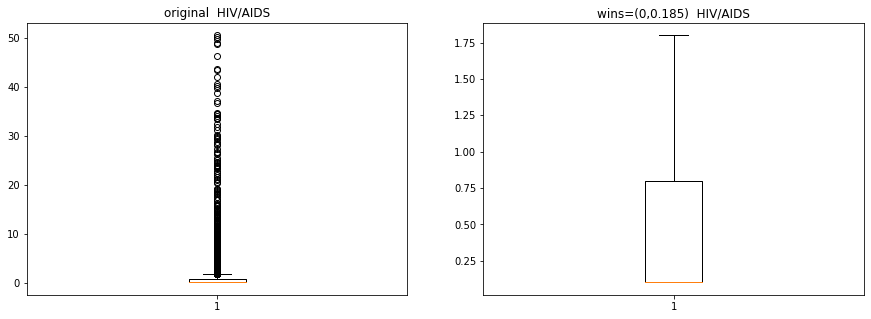

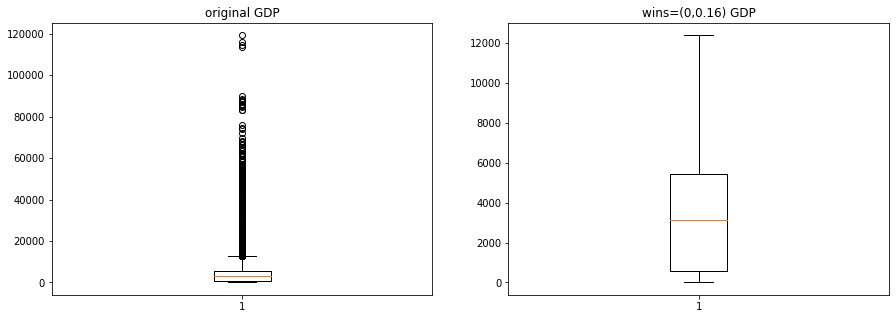

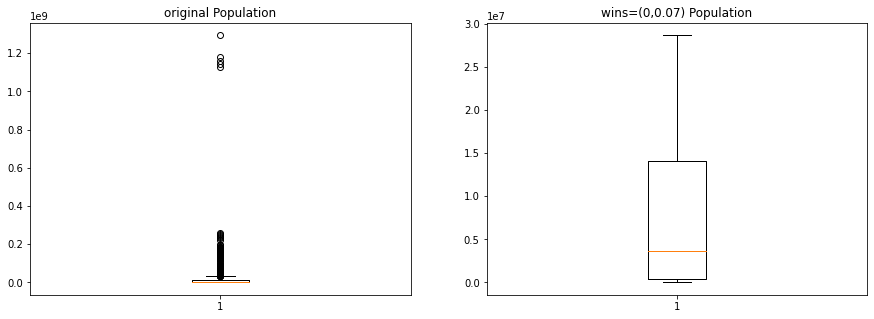

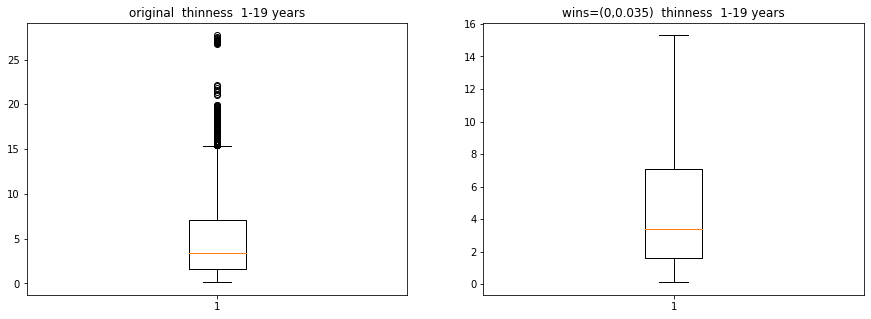

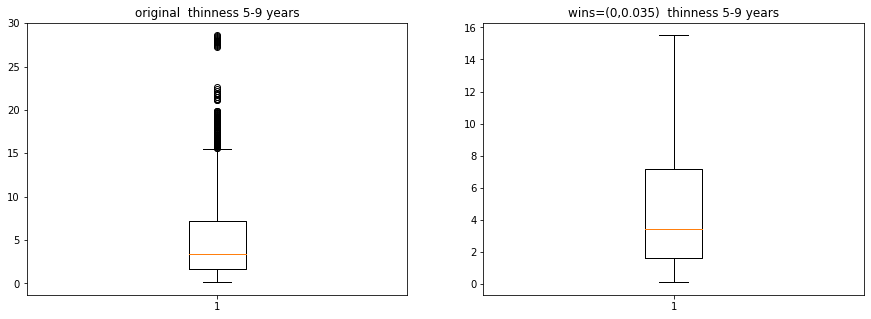

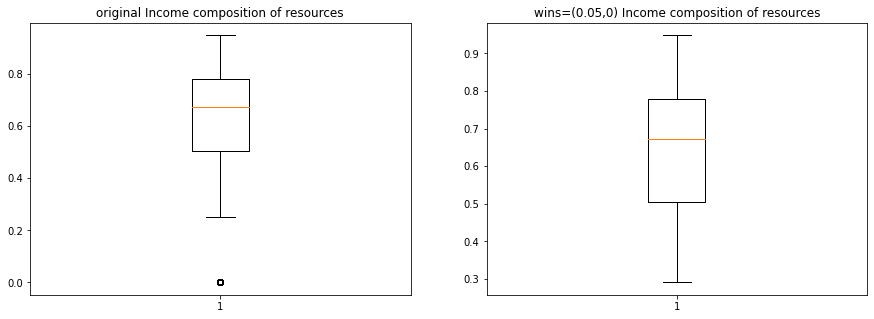

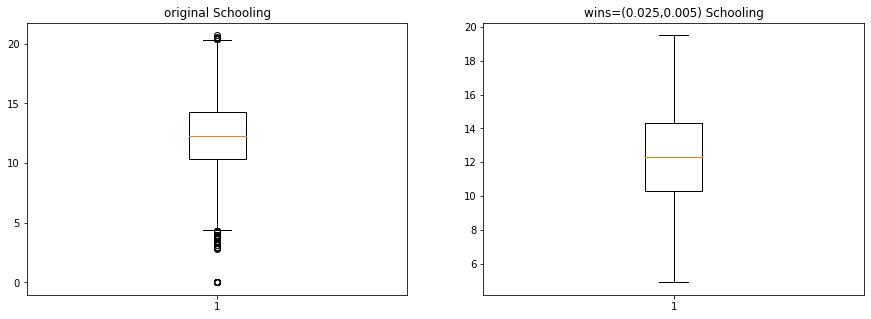

In [14]:
wins_dict={}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=.135, show_plot=True)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=True)
test_wins(cont_vars[4], upper_limit=.135, show_plot=True)
test_wins(cont_vars[5], lower_limit=.1, show_plot=True)
test_wins(cont_vars[6], upper_limit=.19, show_plot=True)
test_wins(cont_vars[8], upper_limit=.135, show_plot=True)
test_wins(cont_vars[9], lower_limit=.1, show_plot=True)
test_wins(cont_vars[10], upper_limit=.02, show_plot=True)
test_wins(cont_vars[11], lower_limit=.160, show_plot=True)
test_wins(cont_vars[12], upper_limit=.185, show_plot=True)
test_wins(cont_vars[13], upper_limit=.160, show_plot=True)
test_wins(cont_vars[14], upper_limit=.07, show_plot=True)
test_wins(cont_vars[15], upper_limit=.035, show_plot=True)
test_wins(cont_vars[16], upper_limit=.035, show_plot=True)
test_wins(cont_vars[17], lower_limit=.05, show_plot=True)
test_wins(cont_vars[18], lower_limit=.025, upper_limit=.005, show_plot=True)

In [15]:
# creating separated dataframes for developed and developing countries
developing = df[(df["Status"].str.contains("Developing"))]
developed = df[(df["Status"].str.contains("Developed"))]

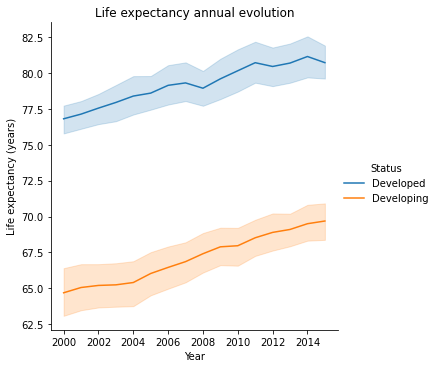

In [16]:
sns.relplot(x="Year", y="Life expectancy ", kind="line", hue="Status",data=df)
pyplot.title("Life expectancy annual evolution", fontsize=12)
sns.set_style("white")
pyplot.xlabel("Year")
pyplot.ylabel("Life expectancy (years)")
pyplot.show()

Life expectancy has increased for both developed and developing countries. Surprisingly, the rate of growth of life expectancy for both developed and develoiping countries is almost thje same even though most of the economic growth in the period under study has come from develkoping countries

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


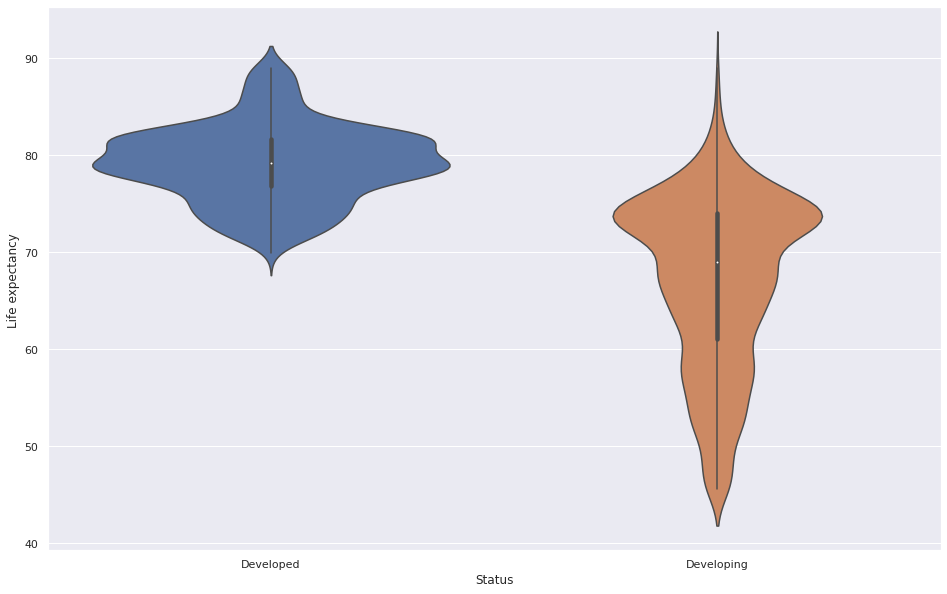

In [17]:
sns.set(rc={'figure.figsize':(16,10)})

sns.violinplot( df['Status'],df['Life expectancy '])

The violin plot for developing countries has a longer tail than that for developed countries. This is because developing countries encompass a wide range of countries from low income to middle income ones.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


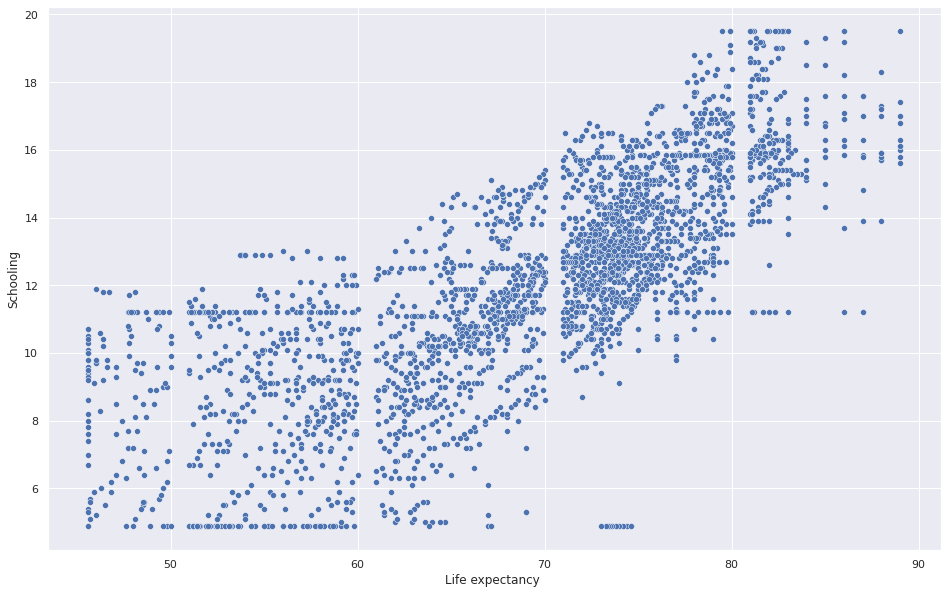

In [18]:
sns.scatterplot(df['Life expectancy '],df['Schooling'])


As schooling increases, life expectancy increases. This may be because of better awareness about hygiene or an indirect relation since developed countries have higfh schooling rates.

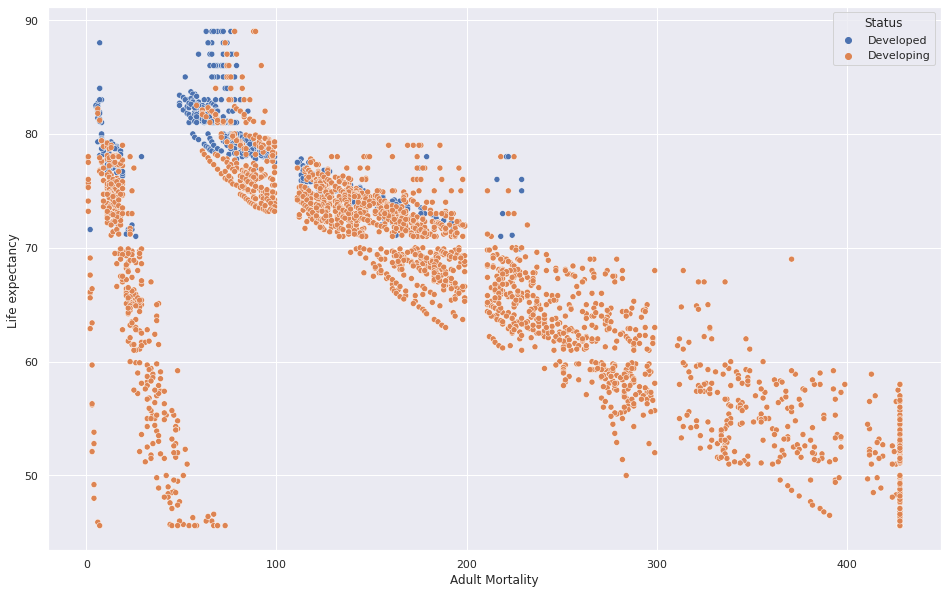

In [19]:
sns.scatterplot(data=df, x="Adult Mortality", y="Life expectancy ", hue="Status")
pyplot.show()

As adult mortality increases,life expectancy decreases.

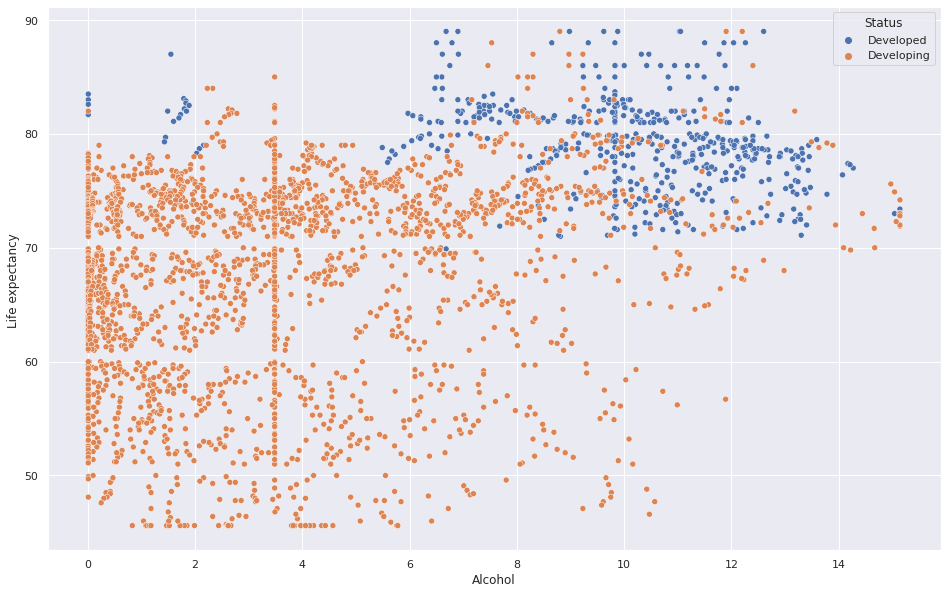

In [20]:
sns.scatterplot(data=df, x="Alcohol", y="Life expectancy ", hue="Status")
pyplot.show()

Alcohol consumption doesn't show any significant effect on life expectancy

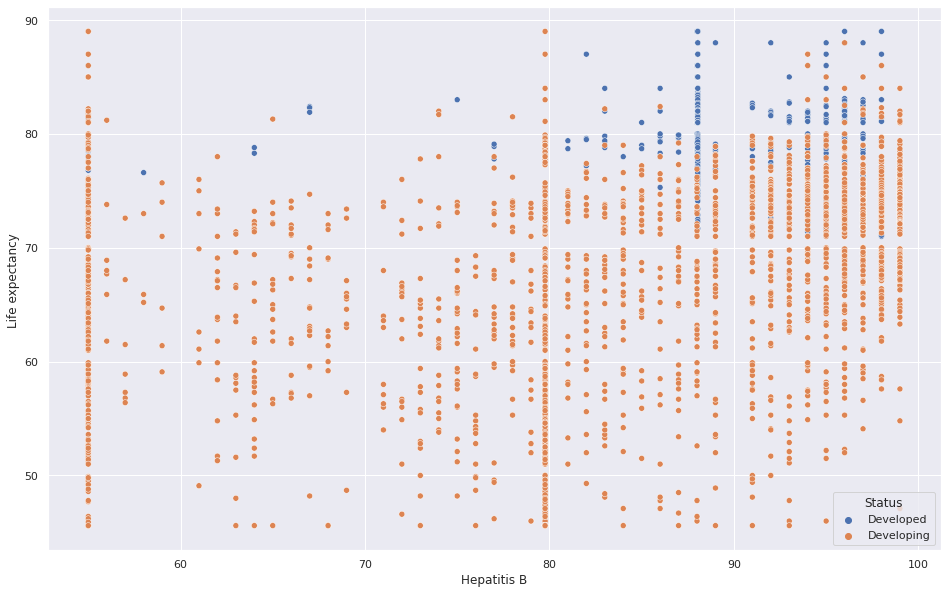

In [21]:
sns.scatterplot(data=df, x="Hepatitis B", y="Life expectancy ", hue="Status")
pyplot.show()

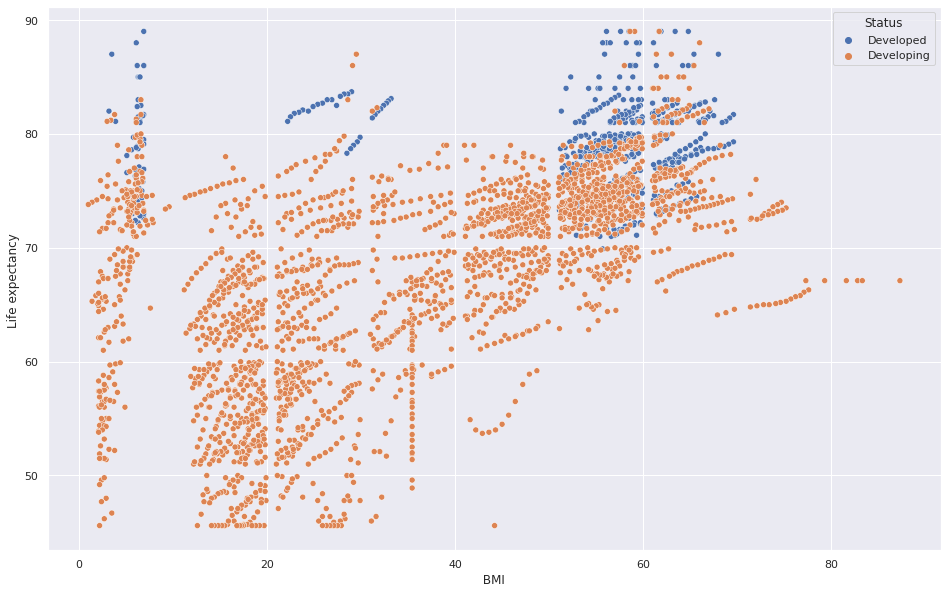

In [22]:
sns.scatterplot(data=df,x=" BMI ",y="Life expectancy ",hue="Status")
pyplot.show()

Life Expectancy increases as BMI increases. This means that as the population gets more nourished, life expectancy increases.

Life expectancy                    1.000000
Income composition of resources    0.808348
Schooling                          0.758259
Diphtheria                         0.599671
Polio                              0.573631
 BMI                               0.561499
GDP                                0.538830
percentage expenditure             0.489011
Alcohol                            0.406934
Hepatitis B                        0.333244
Total expenditure                  0.225806
Year                               0.168031
Population                        -0.012988
Measles                           -0.336888
 thinness 5-9 years               -0.513828
 thinness  1-19 years             -0.516099
infant deaths                     -0.579494
under-five deaths                 -0.603020
Adult Mortality                   -0.687884
 HIV/AIDS                         -0.795993
Name: Life expectancy , dtype: float64

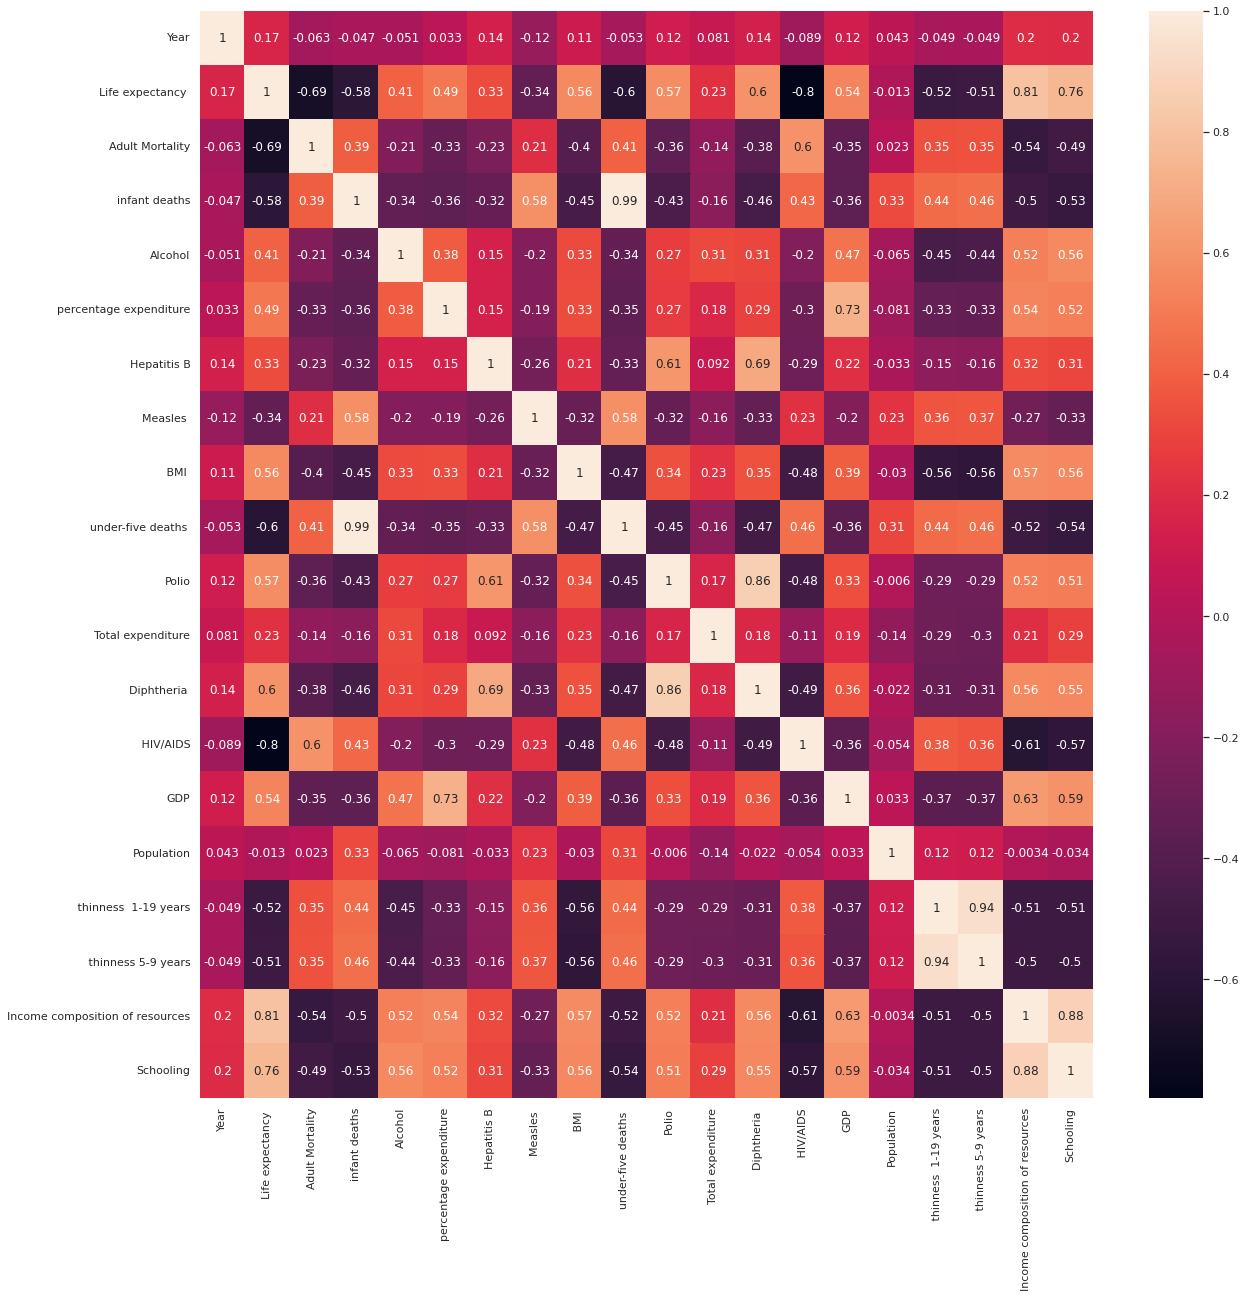

In [23]:
pyplot.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
df.corr()['Life expectancy '].sort_values(ascending=False)

The correlation map shows correlation between the various attributes

In [24]:
df_1=df
df=df.iloc[:,3:21]

The feature scores generated using ANVOA method are: 
Feature  HIV/AIDS: 25.640945
Feature Income composition of resources: 21.158606
Feature Adult Mortality: 10.192759
Feature under-five deaths : 6.862996
Feature Diphtheria : 6.474683
Feature Polio: 6.104903
Feature infant deaths: 6.049315
Feature GDP: 5.863890
Feature  BMI : 5.059636
Feature percentage expenditure: 4.990256
Feature  thinness  1-19 years: 4.917707
Feature  thinness 5-9 years: 4.812756
Feature Alcohol: 3.897560
Feature Measles : 2.313677
Feature Hepatitis B: 2.289250
Feature Total expenditure: 2.217277
Feature Population: 1.064578


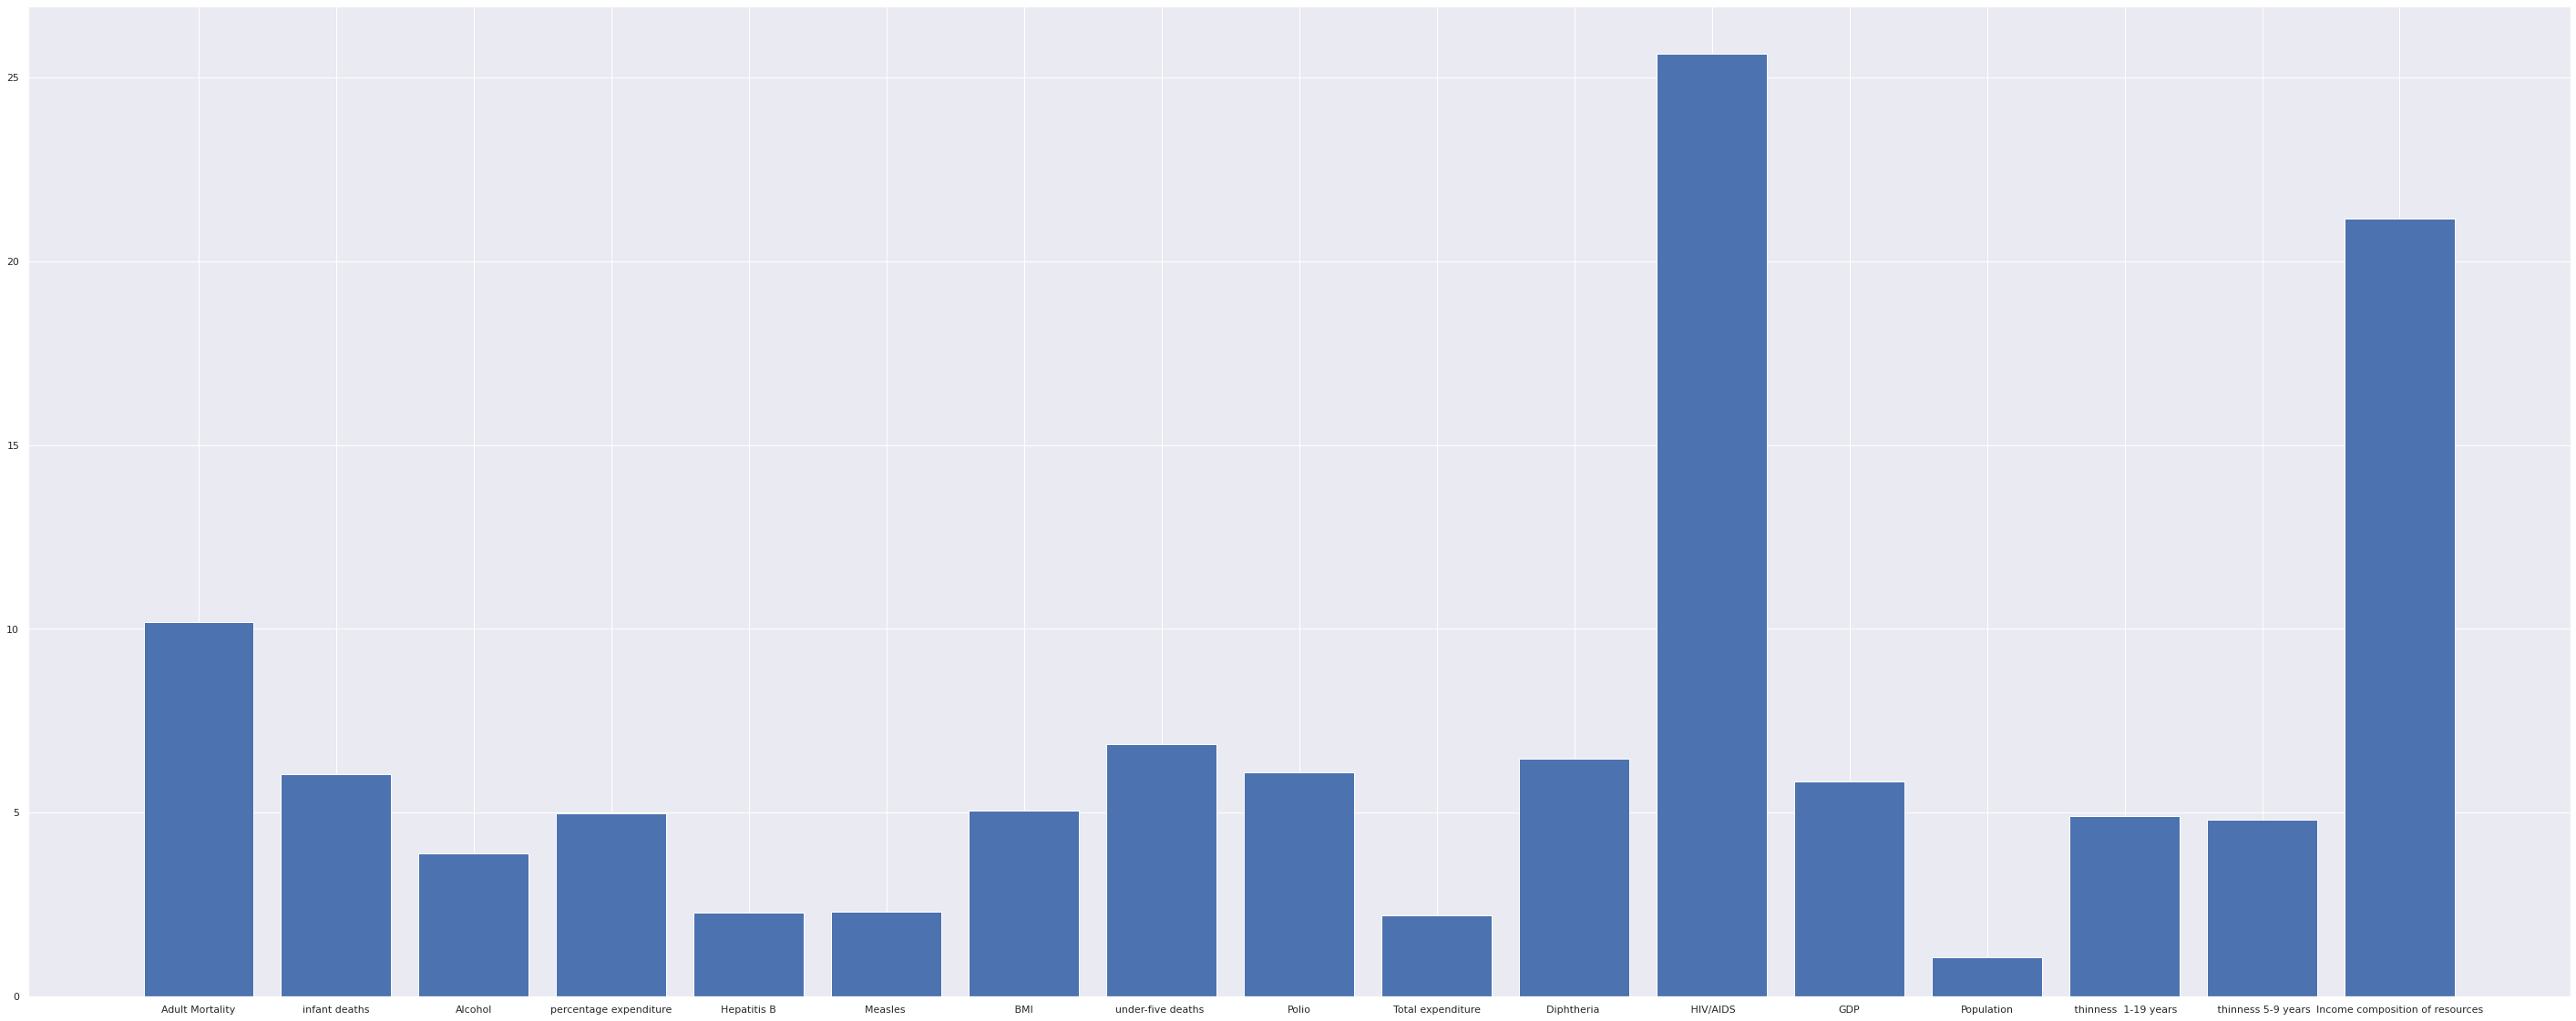

In [25]:
# feature extraction using ANOVA

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# specify features
X = df.drop(columns = ["Life expectancy "], axis = 1) #feature matrix
y = df["Life expectancy "] #target

fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
features = X.columns
print("The feature scores generated using ANVOA method are: ")
features_map = []
for i in range(len(fs.scores_)):
    features_map.append([features[i], float(fs.scores_[i])])
features_map = sorted(features_map, key=lambda x:x[1], reverse = True)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (features_map[i][0], features_map[i][1]))
# plot the scores
pyplot.figure(figsize=(50,20))
pyplot.bar([i for i in features], fs.scores_)
pyplot.show() 

In [26]:
df_2=df[[" HIV/AIDS",'Adult Mortality','under-five deaths ','Income composition of resources','GDP','Diphtheria ','Measles ','Hepatitis B','Polio','percentage expenditure',' BMI ']]


In [27]:
x = df_2
y = df_1['Life expectancy ']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [28]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled.shape


(2203, 11)

In [32]:
model = Sequential()

model.add(Dense(28,input_shape=(11,),activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    bias_regularizer=regularizers.L2(1e-3),
    activity_regularizer=regularizers.L2(1e-4)))

#Hidden Layer
model.add(Dense(56,activation='relu'))
model.add(Dense(42,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(20,activation='relu'))

#Output layer

model.add(Dense(1))

In [33]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])


In [34]:
model.fit(x=x_train_scaled,y=y_train.values,validation_data=(x_test_scaled,y_test.values),batch_size=128,epochs=600)

Epoch 1/600
18/18 [==============================] - 1s 18ms/step - loss: 4808.0151 - mae: 68.6833 - val_loss: 4749.4678 - val_mae: 68.2793
Epoch 2/600
18/18 [==============================] - 0s 5ms/step - loss: 4460.0679 - mae: 66.0867 - val_loss: 4062.5217 - val_mae: 63.0436
Epoch 3/600
18/18 [==============================] - 0s 6ms/step - loss: 3127.3953 - mae: 54.7669 - val_loss: 1630.9434 - val_mae: 39.0403
Epoch 4/600
18/18 [==============================] - 0s 4ms/step - loss: 604.3211 - mae: 20.4621 - val_loss: 387.2027 - val_mae: 16.1657
Epoch 5/600
18/18 [==============================] - 0s 5ms/step - loss: 232.5395 - mae: 12.0048 - val_loss: 197.8408 - val_mae: 10.9396
Epoch 6/600
18/18 [==============================] - 0s 6ms/step - loss: 165.8087 - mae: 9.9925 - val_loss: 148.3896 - val_mae: 9.2871
Epoch 7/600
18/18 [==============================] - 0s 5ms/step - loss: 139.9677 - mae: 9.1223 - val_loss: 129.5260 - val_mae: 8.5607
Epoch 8/600
18/18 [===================

In [35]:
predictions = model.predict(x_test_scaled)


23/23 [==============================] - 0s 2ms/step


In [36]:
mean_abs_error = mean_absolute_error(predictions,y_test)
mean_abs_error

1.9575000695468614

In [43]:
print("RMSE=",np.sqrt(mean_squared_error(predictions,y_test)))
print("R^2=",metrics.r2_score(predictions,y_test))

RMSE= 2.7566725475877627
R^2= 0.9062532811031376


In [44]:
params = [{'n_estimators': [50, 100,200,300,400,500], 
          'criterion': ['squared_error', 'absolute_error'],
           'max_depth': [10, 15, 30, 50, 100, 200],
           'max_features':['auto','sqrt','log2'],
           'random_state':[0, 10, 20, 50, 70, 100],
           'n_jobs':[-1,  1]}]

In [45]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [46]:
# randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
RScv = RandomizedSearchCV(reg, param_distributions = params, 
                          n_iter = 5, cv = 5)
RScv = RScv.fit(x_train_scaled, y_train_scaled)

In [47]:
RScv.best_params_

{'random_state': 100,
 'n_jobs': 1,
 'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 100,
 'criterion': 'squared_error'}

In [51]:
reg=RandomForestRegressor(n_estimators=300,criterion='squared_error',max_features='auto',n_jobs=1,max_depth=100,random_state=100)
regs=reg.fit(x_train_scaled,y_train)

In [52]:
prediction=regs.predict(x_test_scaled)

In [53]:
print("RMSE=",np.sqrt(mean_squared_error(prediction,y_test)))
print("R^2=",metrics.r2_score(prediction,y_test))

RMSE= 2.049005787526277
R^2= 0.9493232296289694


Random Forest Regressor is a better model than neural networks to predict life expectancy